/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0603
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3737
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3567
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3206
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3104
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3117
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2917
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2866
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2791
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2727
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2838
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2702
Epoch 13/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2642
Epoch 14/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2688
Epoch 15/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

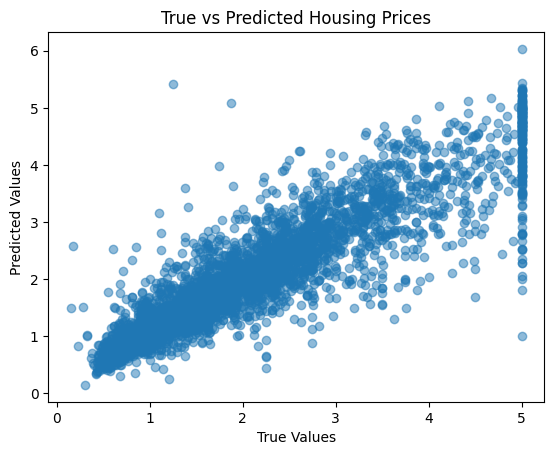

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data.data
y = data.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

class DBM:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.model = self.build_model()

    def build_model(self):
        model = models.Sequential()

        # Add the first hidden layer
        model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
        model.add(layers.Dense(self.layer_sizes[0], activation='relu'))

        for size in self.layer_sizes[1:]:
            model.add(layers.Dense(size, activation='relu'))

        model.add(layers.Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        return model

    def train(self, X_train, y_train, epochs=50, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def evaluate(self, X_test, y_test):
        loss = self.model.evaluate(X_test, y_test)
        return loss

    def predict(self, X):
        return self.model.predict(X)

dbm = DBM(layer_sizes=[256, 128, 64])

dbm.train(X_train, y_train, epochs=50, batch_size=32)

test_loss = dbm.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

y_pred = dbm.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Housing Prices')
plt.show()
